In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf

## Creating the Dataset


In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
 #y = mx + b
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [6]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y Data'])

In [7]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [8]:
y_df.head()

,Y Data
0,4.100354
1,6.279671
2,6.071362
3,3.768398
4,5.324067


In [9]:
my_data = pd.concat([x_df,y_df],axis=1)

In [10]:
my_data.head()

,X Data,Y Data
0,0.00000,4.100354
1,0.00001,6.279671
2,0.00002,6.071362
3,0.00003,3.768398
4,0.00004,5.324067


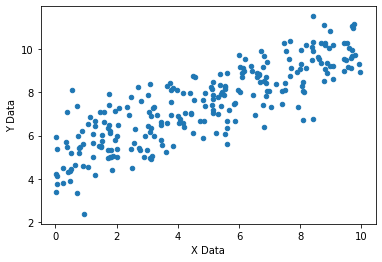

In [11]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y Data')

##Creating the Optimizer

In [28]:
batch_size = 8

In [29]:
np.random.randn(2)

array([ 1.00497378, -1.17179002])

In [40]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [41]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [42]:
y_pred = m*xph+b

In [43]:
error = tf.reduce_sum(tf.square(yph-y_pred))

In [44]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [45]:
init = tf.global_variables_initializer()

##Training the model

In [50]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])   

##Printing the data

In [51]:
model_m

0.53795433

In [52]:
model_b

4.8801346

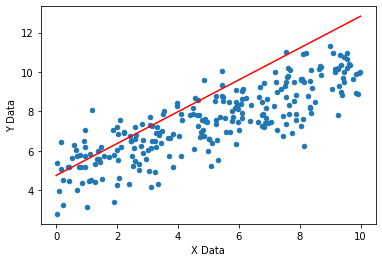

In [53]:
y_final = m_model*x_data + b_model
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y Data')
plt.plot(x_data,y_final,'r')